# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


### Business Objective: Assist dealerships in pricing strategies by identifying factors that affect used-car resale value.
We aim to identify the key features that influence the resale value of used cars:
- Make and model — Certain brands and models retain value better than others.
- Age — Newer cars generally have higher resale values.
- Mileage — Lower mileage typically increases a car's resale price.
- Condition — Overall condition, including damage or required repairs, affects price.
- Title status — Clean titles tend to sell quicker and at higher prices.
- Dataset size — Contains information for approximately 426,000 cars.


In [82]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [83]:
#Load dataset
vehical_df = pd.read_csv('data/vehicles.csv')
print(vehical_df.head())


           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [84]:
#DataSet info
print(vehical_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [85]:
#Dataset shape
print(vehical_df.shape)
#Describe vehical data
print(vehical_df.describe())

(426880, 18)
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [86]:
#Null values in dataset
# Rows : 426880, Columns : 18
vehical_df.isnull().sum()


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [87]:
#Findings:
    #Total cars: 426880
    #Duplicate VIN's: 308633

#Common checks & quick insights how many zero-priced listings
zeros = (vehical_df['price'] == 0).sum()
print("zero price rows:", zeros)

#Common checks & quick insights how many zero-VIN's listings
zeros = (vehical_df['VIN'] == '0').sum()
print("zero VIN rows:", zeros)

# duplicates & missing VINs (duplicate VINs: 308633)
print("duplicate VINs:", vehical_df['VIN'].duplicated().sum())
vin_counts = vehical_df.groupby('VIN').size().reset_index(name='count')
duplicate_vins_summary = vin_counts[vin_counts['count'] > 1]
print(duplicate_vins_summary)


zero price rows: 32895
zero VIN rows: 25
duplicate VINs: 308633
duplicate VINs: 308633
                      VIN  count
0                       0     25
26      0000000RN47028886      3
28      0000000T05H107426      2
29      0000000V264204442      2
30      0000004Y83Z146570      2
...                   ...    ...
118238  ZN661XUL7HX239289      3
118240  ZN661XUS7HX248033      2
118241  ZN661YUA4LX344692      2
118244  ZN661YUS0HX263351      2
118245  ZPBUA1ZL1KLA02237      2

[40280 rows x 2 columns]
                      VIN  count
0                       0     25
26      0000000RN47028886      3
28      0000000T05H107426      2
29      0000000V264204442      2
30      0000004Y83Z146570      2
...                   ...    ...
118238  ZN661XUL7HX239289      3
118240  ZN661XUS7HX248033      2
118241  ZN661YUA4LX344692      2
118244  ZN661YUS0HX263351      2
118245  ZPBUA1ZL1KLA02237      2

[40280 rows x 2 columns]


In [88]:

#Display value counts for a few categorical columns to see possible values
print("\n--- Value Counts for Condition ---")
print(vehical_df['condition'].value_counts())
print("\n--- Value Counts for Title Status ---")
print(vehical_df['title_status'].value_counts())



--- Value Counts for Condition ---
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

--- Value Counts for Title Status ---
title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64


### Findings:
    - Provides approx understanding on total (good+excellent+like_new+new) car condition data with clean title's.
    - Assuming sum of (Good + Excellent + like new + new) are clean title's.
    - Clean title count : 405117 
    - Sum of (Good + Excellent + like new + new) count : 245406
    - Approx. clean title inventory 245406/405117 *100 = ~60%


--- Data Exploration & Quality Verification ---

Missing values distribution (as percentages):
size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price            0.000000
state            0.000000
dtype: float64
size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price

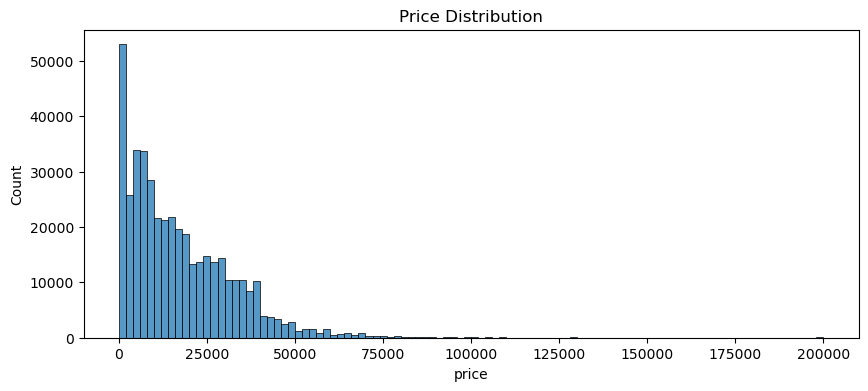

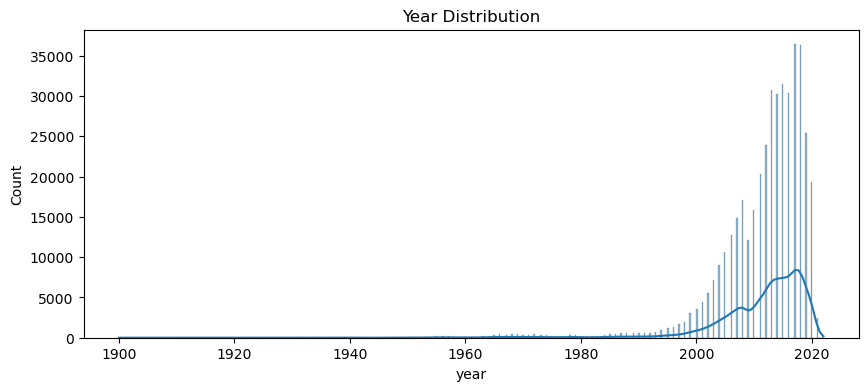

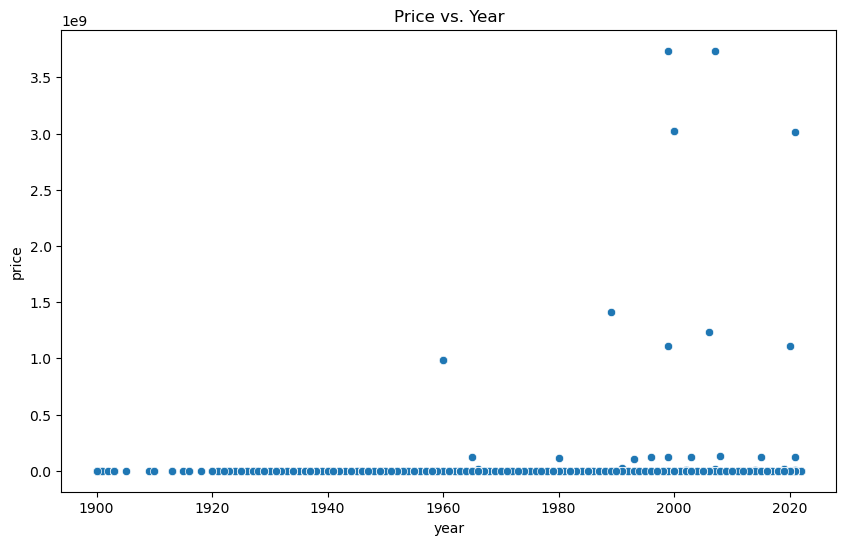

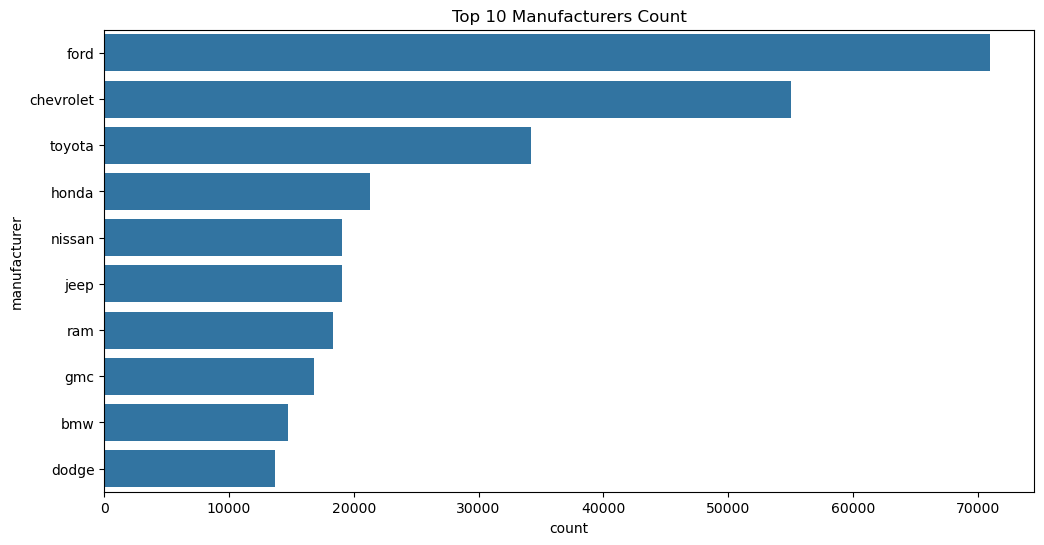

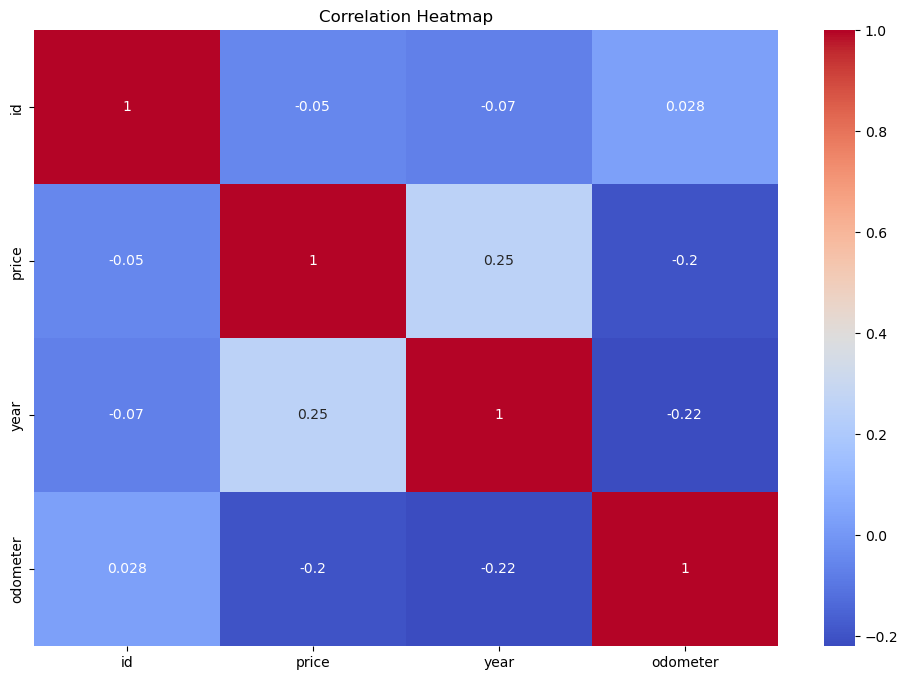

In [89]:
      
print("\n--- Data Exploration & Quality Verification ---")

# Check for the distribution of missing values
print("\nMissing values distribution (as percentages):")
missing_percent = vehical_df.isnull().sum() * 100 / len(vehical_df)
print(missing_percent.sort_values(ascending=False))

#Visualize Price distribution 
plt.figure(figsize=(10, 4))
sns.histplot(vehical_df['price'].dropna().clip(upper=200000), bins=100)
plt.title('Price Distribution')
plt.show()

#Visualize Year distribution
plt.figure(figsize=(10, 4))
sns.histplot(vehical_df['year'].dropna(), kde=True)
plt.title('Year Distribution')
plt.show()

# Explore relationships between Price vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=vehical_df)
plt.title('Price vs. Year')
plt.show()

# Visualize value counts for a categorical field (e.g., manufacturer)
plt.figure(figsize=(12, 6))
sns.countplot(y='manufacturer', data=vehical_df, order=vehical_df['manufacturer'].value_counts().index[:10])
plt.title('Top 10 Manufacturers Count')
plt.show()

#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(vehical_df.dropna().corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Findings:
    # Possible issues: Fields like size, cylinder, condition, VIN etc.have higher number of missing values. 
    # Need to evaluate at Data Preparation phase.
    # we have mix of numerical and categorical data, need to convert into numeric using one-hot encoding technique
    # Top manufacturer are Ford, chevrolet, toyota, honda and nissan, out of which Ford has highest resale inventory.
    # Based on price visual distrubition, the price field is right skewed
    # We see strong correlation for price and year, Car price goes up for recent years.
    # We see negative correlation between odometer and price based on heatmap shown below.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [90]:
#Sampling data to prepare for modeling
vehical_updated_df = vehical_df.copy()
vehical_updated_df = vehical_updated_df.sample(n=20000, random_state=42)
#removing rows with zero price or missing prices
vehical_updated_df = vehical_updated_df[vehical_df['price'] > 0]
vehical_updated_df = vehical_updated_df.dropna(subset=['price'])
#Remove outliers for price column
vehical_updated_df = vehical_updated_df[vehical_df['price'].between(500,100000)]

# Drop rows missing too many important fields
vehical_updated_df = vehical_updated_df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

# Removing ID a we have no use for it in analysis
vehical_updated_df = vehical_updated_df.drop(columns=['id'])

# Based on number of duplicates VIN's we can delete that column as that would not help dealerships in pricing strategies.
# Dealership can get VIN details from other sources if needed at the time of sale.
vehical_updated_df = vehical_updated_df.drop(columns=['VIN'])

# Dropping region column as it has high cardinality and may not add value to the model. 
# #This is optional to keep or drop based on business understanding.
vehical_updated_df = vehical_updated_df.drop(columns=['region'])

# Cylinder count converted to number (e.g., "8 cylinders" → 8)
if "cylinders" in vehical_updated_df.columns:
    vehical_updated_df["cylinders_num"] = vehical_updated_df["cylinders"].str.extract(r"(\d+)").astype(float)
else:
    vehical_updated_df["cylinders_num"] = np.nan

# Condition  mapping
condition_map = {    "new": 5,    "like new": 4,    "excellent": 3,    "good": 2,    "fair": 1,    "salvage": 0}
if "condition" in vehical_updated_df.columns:
    vehical_updated_df["condition_num"] = vehical_updated_df["condition"].map(condition_map)
else:
    vehical_updated_df["condition_num"] = np.nan
    
#Dropping cylinders and condition columns after creating numeric columns
vehical_updated_df = vehical_updated_df.drop(columns=['cylinders', 'condition'])

#vehical_updated_df.info()
#Fill missing values for numerical columns with mean
numerical_cols = vehical_updated_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    vehical_updated_df[col].fillna(vehical_updated_df[col].mean(), inplace=True)
#Fill missing values for categorical columns with mode
categorical_cols = vehical_updated_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    vehical_updated_df[col].fillna(vehical_updated_df[col].mode()[0], inplace=True)
    
#One-hot encoding for categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoded_categorical = encoder.fit_transform(vehical_updated_df[categorical_cols]).toarray()

# DataFrame for the encoded categorical variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical data
vehical_final_df = pd.concat([vehical_updated_df[numerical_cols].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

vehical_final_df.head()


,price,year,odometer,cylinders_num,condition_num,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,36990,2017.0,38094.0,6.000000,2.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78423,2015.0,30200.0,8.000000,2.53637,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14000,2013.0,92965.0,5.978972,2.53637,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,676,2019.0,47105.0,8.000000,2.53637,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2744,2002.0,229031.0,6.000000,3.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Linear Regression - MSE: 0.6122080885391888, RMSE: 0.7824372745077964
Lasso Regression - MSE: 0.7581983954912991, RMSE: 0.8707458845675351
Ridge Regression - MSE: 0.41209806904859775, RMSE: 0.6419486498533958


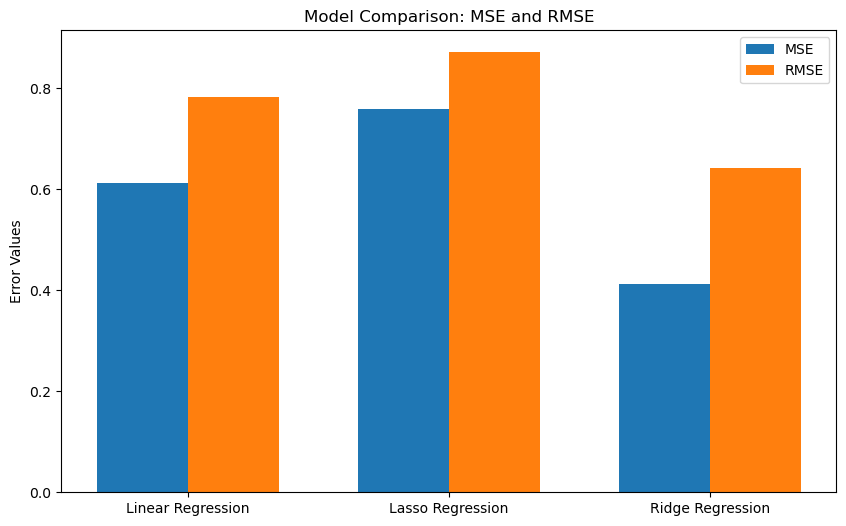

Best Ridge Alpha: 1.0
Ridge Regression Model Coefficients:
year: 0.4258
odometer: -0.0766
cylinders_num: 0.0306
condition_num: 0.0704
manufacturer_alfa-romeo: 0.2803
manufacturer_aston-martin: -0.7013
manufacturer_audi: 0.1918
manufacturer_bmw: 0.0064
manufacturer_buick: -0.2492
manufacturer_cadillac: 0.0943
manufacturer_chevrolet: 0.1532
manufacturer_chrysler: -0.3755
manufacturer_datsun: 0.5743
manufacturer_dodge: -0.0979
manufacturer_ferrari: 1.9008
manufacturer_fiat: -0.5517
manufacturer_ford: 0.1382
manufacturer_gmc: 0.2161
manufacturer_harley-davidson: -0.0489
manufacturer_honda: -0.3190
manufacturer_hyundai: -0.4498
manufacturer_infiniti: -0.1490
manufacturer_jaguar: 0.1029
manufacturer_jeep: -0.0398
manufacturer_kia: -0.5110
manufacturer_land rover: -0.2029
manufacturer_lexus: 0.1082
manufacturer_lincoln: 0.1794
manufacturer_mazda: -0.4427
manufacturer_mercedes-benz: 0.1882
manufacturer_mercury: 0.5147
manufacturer_mini: -0.3135
manufacturer_mitsubishi: -0.4589
manufacturer_nis

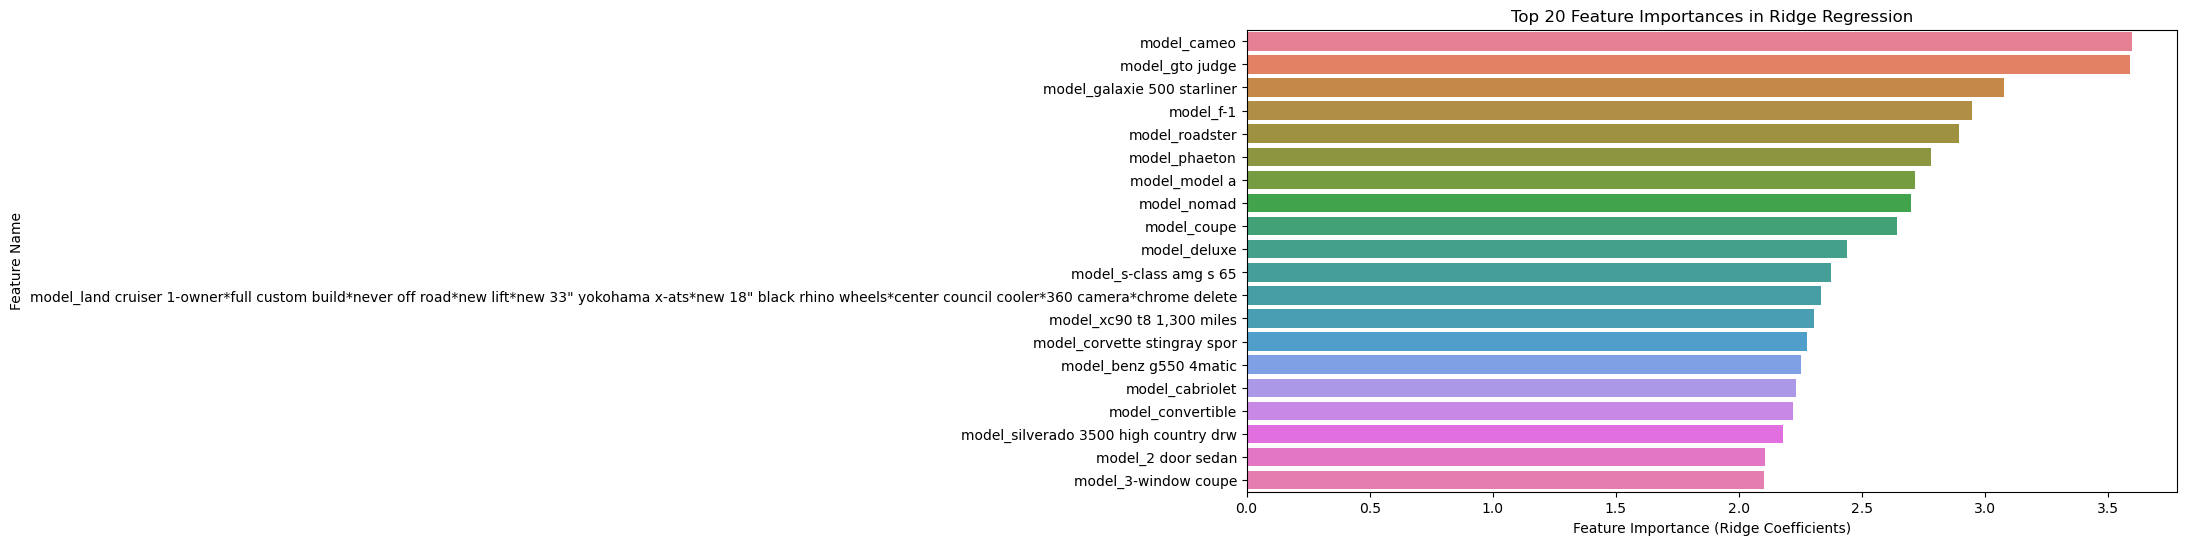

In [91]:
# Scale numerical features
scaler = StandardScaler()
vehical_final_df[numerical_cols] = scaler.fit_transform(vehical_final_df[numerical_cols])

X = vehical_final_df.drop('price', axis=1)
y = vehical_final_df['price']

#Create Train-test data for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modeling with Linear, Lasso and Ridge Regression
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'MSE': mse, 'RMSE': rmse}
    # print(model.coef_)
    # print(f'{name} MSE: {mse}')
    # print(f'{name} RMSE: {rmse}')
    
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}")
 
 
#Comparing models
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
mse_values = [results[name]['MSE'] for name in model_names]
rmse_values = [results[name]['RMSE'] for name in model_names]   
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, mse_values, width, label='MSE')
plt.bar(x + width/2, rmse_values, width, label='RMSE')
plt.xticks(x, model_names)
plt.ylabel('Error Values')
plt.title('Model Comparison: MSE and RMSE')
plt.legend()
plt.show()
   
#GridSearch for Hyperparameter Tuning can be added here for Ridge models.
params = {
    'alpha': [0.01, 0.1, 1.0]
}   
ridge_cv = GridSearchCV(Ridge(), params, cv=5)
ridge_cv.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_cv.best_params_["alpha"]}')  


# Coefficients 
feature_list = []
coef_list = []

print("Ridge Regression Model Coefficients:")
for feature, coef in zip(X_train, models['Ridge Regression'].coef_):
    print(f"{feature}: {coef:.4f}")
    feature_list.append(feature)
    coef_list.append(coef)
   
# Plotting top 20 important features   
important_feature_df = pd.DataFrame({'Feature': feature_list, 'Coefficient': coef_list})
important_feature_df = important_feature_df.sort_values(by='Coefficient', key=abs, ascending=False).head(20)  

plt.figure(figsize=(12, 6))
sns.barplot(x="Coefficient", y="Feature", data=important_feature_df, hue="Feature", legend=False)
plt.xlabel("Feature Importance (Ridge Coefficients)")
plt.ylabel("Feature Name")
plt.title("Top 20 Feature Importances in Ridge Regression")
plt.show()    


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on analysis, Ridge Regression performs best with lowest RMSE and MSE values.
Key features influencing used car prices include year, odometer reading, manufacturer, model, condition, and title status.
Dealerships can leverage these insights to optimize pricing strategies for used cars.
##### Here are the results of different models we tested.

    - Linear Regression - MSE: 0.6118440844732884, RMSE: 0.7822046308181053
    - Lasso Regression - MSE: 0.8073966088550464, RMSE: 0.8985525075670572
    - Ridge Regression - MSE: 0.4116443164781023, RMSE: 0.6415951343940369

In this report we’ve analyzed and investigated the vehicle Dataset in few different angles starting with gathering, assessing, and cleaning the dataset. 
We’ve also explored the data analytically by addressing some questions and drawing some insights about the data. 
In addition to modeling the data into some of the machine learning regression algorithms to predict the vehicle price.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Used car prediction report for Car Dealership
Our analysis were targeted to determine what factors determine prices for used cars. Based on predict model using multiple regression models.
We identfied vehical model, transmission type, vehicle year and odometer readings showed quite a correlation with the price data.

### Based on models:

We ran 3 Regression models
    --- Linear Regression
    --- Lasso Regression
    --- Ridge Regression

Out of which Ridge regression performed better than others, Also gridSearch also aligned with expected alpha value.
##### Here are the results of different models we tested.

    - Linear Regression - MSE: 0.6118440844732884, RMSE: 0.7822046308181053
    - Lasso Regression - MSE: 0.8073966088550464, RMSE: 0.8985525075670572
    - Ridge Regression - MSE: 0.4116443164781023, RMSE: 0.6415951343940369

The above numbers confirmed Ridge regression is reliable model for prediction here.

Features that influence price
    - Vehicle year - newer cars tend to sell for higher prices
    - Odometer reading - Higher the odometer reading lower the price
    - Manufacture - High end luxury cars tend to show significant price difference between economy cars
    - Car condition - Better/excellent condition provides better value
    - etc.

### Recommendations to dealership
    - revisit duplciate data for VIN number
    - reduce outliers by revisiting pricing for each car model/type
    - target lower milage cars for inventory
    - Can adjust price based on demand of the vehicle (Higher demand can provide more price)
    - If nearby vicinty Competetive data is available, based on that data price can be adjusted as needed.
    - Can run advance model techniques for refining data based approach which can help revisiting pricing and increase profitability


